In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from lightgbm.sklearn import LGBMClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold

%matplotlib inline

In [5]:
df = pd.read_json("../data/scenario_enhanced_law_cases.json")
df = df[["generated_scenario", "division_type"]]
df.generated_scenario = df.generated_scenario.str.strip()
df.head()

,generated_scenario,division_type
0,I filed an appeal with the Court of Arbitratio...,Civil
1,I want to build two residential chalets on my ...,Public
2,I received a payment order from A.________ AG ...,Civil
3,"My lawyer, I filed a criminal complaint agains...",Criminal
4,A company (A.________ SA) is appealing a decis...,Public


In [14]:
df[df.case == ""]

,case,y


In [6]:
df.division_type.value_counts()

division_type
Public      1591
Civil        719
Criminal     533
Name: count, dtype: int64

In [15]:
id2label = {k: v for k, v in enumerate(df.division_type.unique())}
label2id = {k: v for v, k in id2label.items()}
df["y"] = df.division_type.apply(lambda x: label2id[x])
df["case"] = df.generated_scenario
df = df[["case", "y"]]
df.head()

AttributeError: 'DataFrame' object has no attribute 'division_type'

In [25]:
df[df.case == "None"]

,case,y,len


In [28]:
df.case = df.case.astype(str)
df = df[df.case != "None"] 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17610
[LightGBM] [Info] Number of data points in the train set: 2219, number of used features: 510
[LightGBM] [Info] Start training from score -1.353926
[LightGBM] [Info] Start training from score -0.566739
[LightGBM] [Info] Start training from score -1.746387
===== Fold #0 =====
Accuracy: 0.8595
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       144
           1       0.87      0.92      0.89       314
           2       0.83      0.72      0.77        97

    accuracy                           0.86       555
   macro avg       0.85      0.82      0.84       555
weighted avg       0.86      0.86      0.86       555



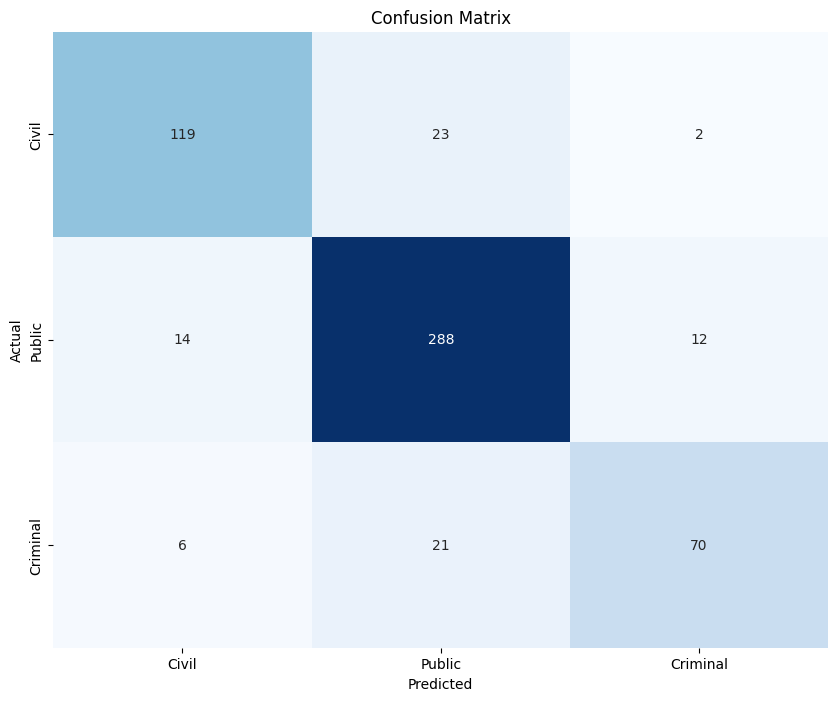

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17622
[LightGBM] [Info] Number of data points in the train set: 2219, number of used features: 511
[LightGBM] [Info] Start training from score -1.353926
[LightGBM] [Info] Start training from score -0.566739
[LightGBM] [Info] Start training from score -1.746387
===== Fold #1 =====
Accuracy: 0.8613
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       144
           1       0.87      0.92      0.89       314
           2       0.85      0.77      0.81        97

    accuracy                           0.86       555
   macro avg       0.86      0.83      0.84       555
weighted avg       0.86      0.86      0.86       555



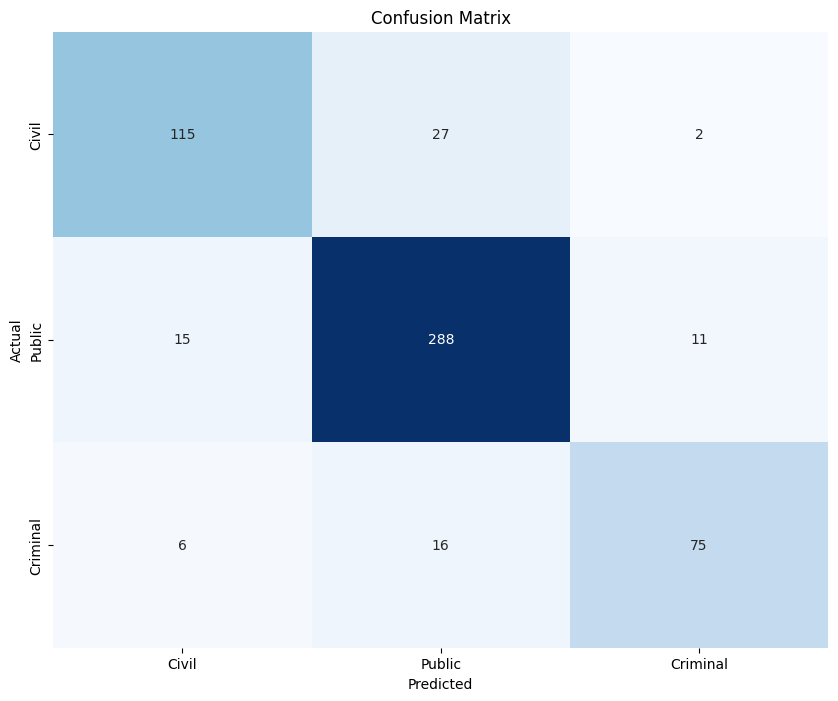

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17641
[LightGBM] [Info] Number of data points in the train set: 2219, number of used features: 517
[LightGBM] [Info] Start training from score -1.352183
[LightGBM] [Info] Start training from score -0.567533
[LightGBM] [Info] Start training from score -1.746387
===== Fold #2 =====
Accuracy: 0.8559
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       143
           1       0.86      0.93      0.89       315
           2       0.88      0.71      0.79        97

    accuracy                           0.86       555
   macro avg       0.86      0.81      0.83       555
weighted avg       0.86      0.86      0.85       555



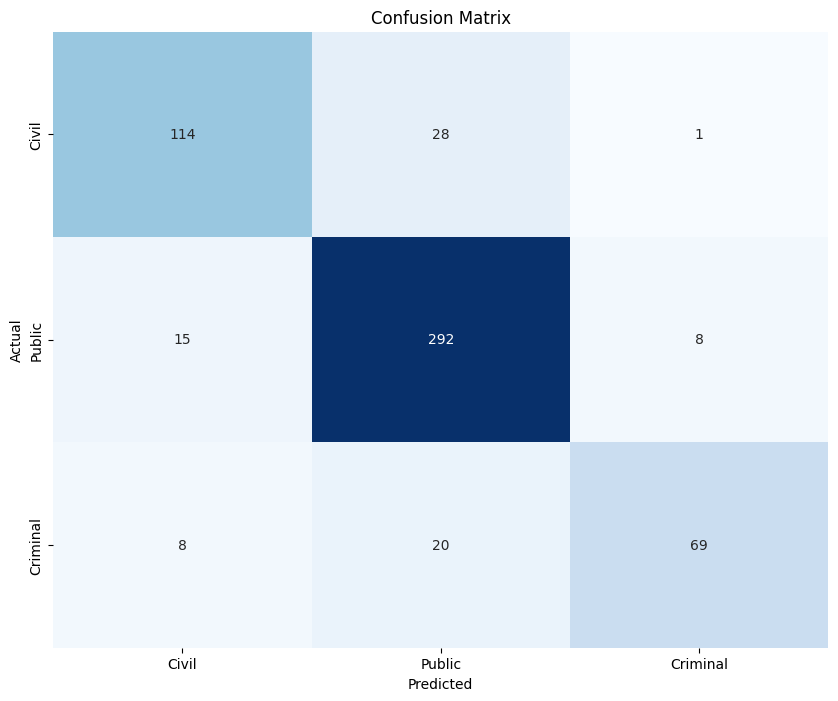

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17713
[LightGBM] [Info] Number of data points in the train set: 2219, number of used features: 518
[LightGBM] [Info] Start training from score -1.352183
[LightGBM] [Info] Start training from score -0.567533
[LightGBM] [Info] Start training from score -1.746387
===== Fold #3 =====
Accuracy: 0.8595
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       143
           1       0.88      0.90      0.89       315
           2       0.86      0.77      0.82        97

    accuracy                           0.86       555
   macro avg       0.85      0.83      0.84       555
weighted avg       0.86      0.86      0.86       555



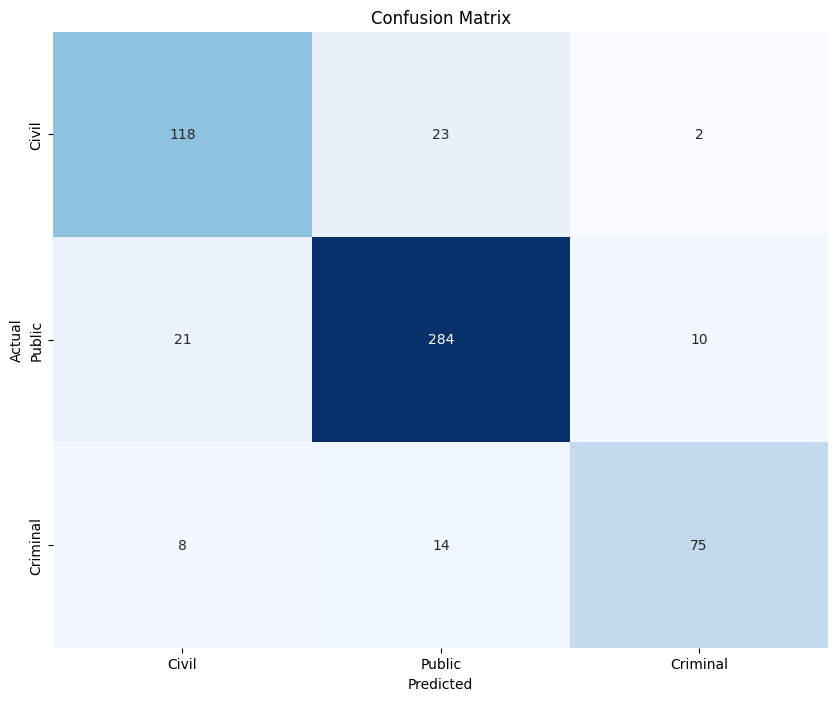

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17648
[LightGBM] [Info] Number of data points in the train set: 2220, number of used features: 516
[LightGBM] [Info] Start training from score -1.352633
[LightGBM] [Info] Start training from score -0.567984
[LightGBM] [Info] Start training from score -1.744257
===== Fold #4 =====
Accuracy: 0.8574
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       143
           1       0.87      0.93      0.90       315
           2       0.81      0.71      0.76        96

    accuracy                           0.86       554
   macro avg       0.85      0.81      0.83       554
weighted avg       0.86      0.86      0.86       554



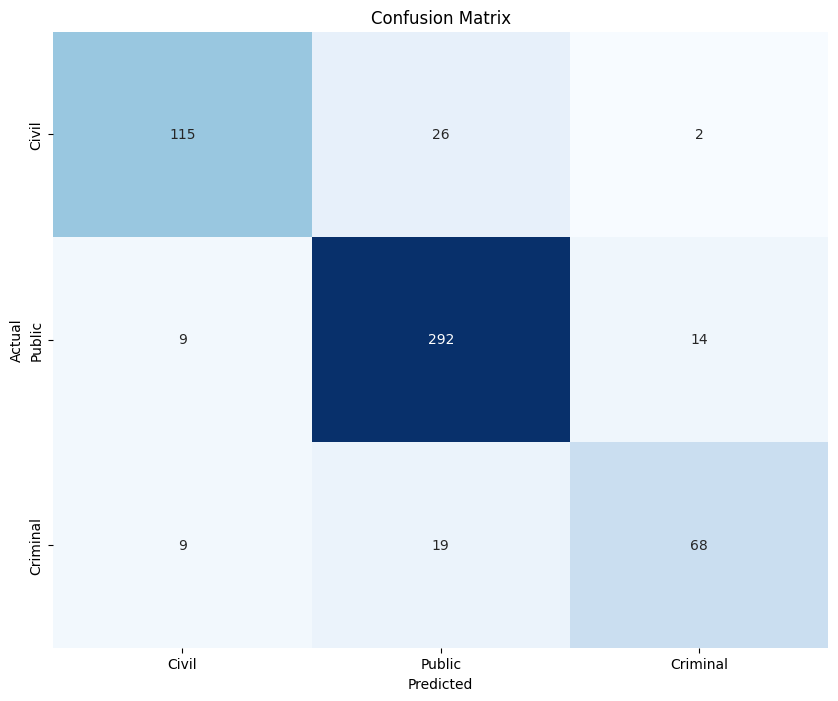

In [29]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for fold, (train_idx, val_idx) in enumerate(skf.split(df, df.y)):
    X_train, y_train = df.iloc[train_idx]["case"], df.iloc[train_idx]["y"]
    X_val, y_val = df.iloc[val_idx]["case"], df.iloc[val_idx]["y"]

    tfidf_vectorizer = TfidfVectorizer()
    X_train = tfidf_vectorizer.fit_transform(X_train)
    X_val = tfidf_vectorizer.transform(X_val)

    model = LGBMClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    print(f"===== Fold #{fold} =====")
    accuracy = accuracy_score(y_val, y_pred)
    scores.append(accuracy)
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(y_val, y_pred))
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[id2label[x] for x in model.classes_], yticklabels=[id2label[x] for x in model.classes_])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print(f"========================")

In [30]:
import numpy as np

np.mean(scores)

0.8586873516115393